In [1]:

!pip install ultralytics gtts IPython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.9 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.3.1
    Uninstalling click-8.3.1:
      Successfully uninstalled click-8.3.1


In [3]:
import torch
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
from ultralytics import YOLO
from gtts import gTTS
import IPython.display as ipd
import numpy as np


In [4]:
# Approximate real-world object heights (in meters)
KNOWN_HEIGHTS = {
    "person": 1.7,
    "chair": 1.0,
    "bottle": 0.25,
    "car": 1.5
}

FOCAL_LENGTH = 600  # approximate camera focal length


In [13]:
def estimate_distance(class_name, box_height):
    if class_name not in KNOWN_HEIGHTS or box_height == 0:
        return None
    return round((KNOWN_HEIGHTS[class_name] * FOCAL_LENGTH) / box_height, 2)



In [14]:
def get_direction(x1, x2, frame_width):
    box_center = (x1 + x2) // 2
    frame_center = frame_width // 2

    if box_center < frame_center - 50:
        return "on your left"
    elif box_center > frame_center + 50:
        return "on your right"
    else:
        return "ahead"


In [15]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]


Saving WhatsApp Image 2026-01-17 at 4.33.06 PM.jpeg to WhatsApp Image 2026-01-17 at 4.33.06 PM (2).jpeg


In [16]:
model = YOLO("yolov8n.pt")


In [6]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]


Saving WhatsApp Image 2026-01-17 at 4.33.06 PM.jpeg to WhatsApp Image 2026-01-17 at 4.33.06 PM (1).jpeg


In [7]:
model = YOLO("yolov8n.pt")  # lightweight and fast


In [17]:
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
frame_height, frame_width, _ = image_rgb.shape


In [8]:
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [9]:
results = model(image_rgb)



0: 640x448 2 persons, 207.3ms
Speed: 8.8ms preprocess, 207.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


In [18]:
audio_messages = []

for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls_id = int(box.cls[0])
        class_name = model.names[cls_id]

        box_height = y2 - y1
        distance = estimate_distance(class_name, box_height)
        direction = get_direction(x1, x2, frame_width)

        label = class_name
        message = class_name

        if distance:
            label += f" {distance}m"
            message += f" {distance} meters"

        label += f" ({direction})"
        message += f" {direction}"

        audio_messages.append(message)

        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image_rgb, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)


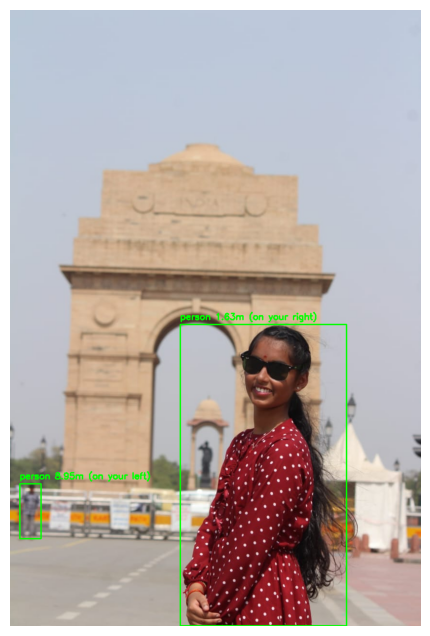

In [19]:
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()


In [20]:
if audio_messages:
    final_text = "Detected objects: " + ", ".join(set(audio_messages))
    print(final_text)

    tts = gTTS(final_text)
    tts.save("output.mp3")
    ipd.display(ipd.Audio("output.mp3", autoplay=True))
else:
    print("No objects detected")


Detected objects: person 1.63 meters on your right, person 8.95 meters on your left


In [10]:
detected_info = []

for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls_id = int(box.cls[0])
        class_name = model.names[cls_id]

        box_height = y2 - y1
        distance = estimate_distance(class_name, box_height)

        label = class_name
        if distance:
            label += f" {distance}m"
            detected_info.append(f"{class_name} at {distance} meters")
        else:
            detected_info.append(class_name)

        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image_rgb, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)


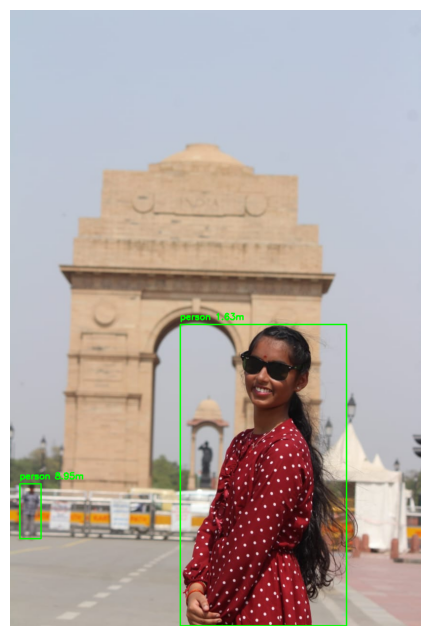

In [11]:
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()


In [12]:
if detected_info:
    text_to_speak = "Detected objects are: " + ", ".join(set(detected_info))
    print(text_to_speak)

    tts = gTTS(text_to_speak, lang="en")
    tts.save("output.mp3")

    ipd.display(ipd.Audio("output.mp3", autoplay=True))
else:
    print("No objects detected.")


Detected objects are: person at 1.63 meters, person at 8.95 meters


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Saving WhatsApp Image 2026-01-17 at 4.33.06 PM.jpeg to WhatsApp Image 2026-01-17 at 4.33.06 PM.jpeg

image 1/1 /content/WhatsApp Image 2026-01-17 at 4.33.06 PM.jpeg: 640x448 2 persons, 396.5ms
Speed: 17.9ms preprocess, 396.5ms inference, 46.5ms postprocess per image at shape (1, 3, 640, 448)


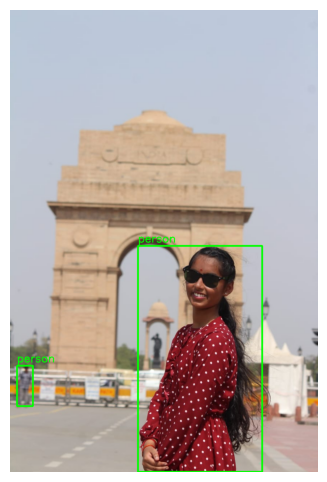

Detected objects are: person


In [2]:

import torch
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
from ultralytics import YOLO
from gtts import gTTS
import IPython.display as ipd

# Step 1: Upload Image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Step 2: Load the YOLOv8 Model
model = YOLO('yolov8n.pt')  # Using YOLOv8 nano model (lightweight)

# Step 3: Perform Object Detection
results = model(image_path)

# Load Image using OpenCV
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 4: Draw Bounding Boxes and Labels
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
        class_id = int(box.cls[0])  # Class ID
        label = model.names[class_id]  # Object label

        # Draw Bounding Box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 3)
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Step 5: Display Image with Detected Objects
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis("off")
plt.show()

# Step 6: Convert Object Names to Speech
detected_objects = list(set(model.names[int(box.cls[0])] for result in results for box in result.boxes))
if detected_objects:
    text_to_speak = "Detected objects are: " + ", ".join(detected_objects)
    print(text_to_speak)

    # Convert text to speech
    tts = gTTS(text_to_speak, lang="en")
    tts.save("output.mp3")

    # Play the generated audio
    ipd.display(ipd.Audio("output.mp3", autoplay=True))
else:
    print("No objects detected.")